
#**practical -1 Bike Details Dataset**

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bike_df = pd.read_csv('BIKE DETAILS.csv')
bike_df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


Q.1  What is the range of selling prices in the dataset

In [78]:
min_price = bike_df['selling_price'].min()
max_price = bike_df['selling_price'].max()
min_price, max_price

(5000, 760000)

Q.2 What is the median selling price for bikes in the dataset?

In [79]:
bike_df['selling_price'].median()

45000.0

Q.3  What is the most common seller type?

In [80]:
bike_df['seller_type'].value_counts().idxmax()

'Individual'

Q.4 How many bikes have driven more than 50,000 kilometers?

In [81]:
bike_df[bike_details_df['km_driven'] > 50000].shape[0]

170

Q5. What is the average km_driven value for each ownership type?

In [82]:
bike_df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


Q6. What proportion of bikes are from the year 2015 or older?

In [83]:
proportion_old = (bike_df[bike_df['year'] <= 2015].shape[0] / len(bike_df)) * 100
proportion_old

56.64467483506126

Q7. What is the trend of missing values across the dataset?

In [84]:
bike_df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


Q8. What is the highest ex_showroom_price recorded, and for which bike?

In [85]:
bike_df.loc[bike_df['ex_showroom_price'].idxmax(), ['name', 'ex_showroom_price']]

,134
name,Harley-Davidson Street Bob
ex_showroom_price,1278000.0


Q9. What is the total number of bikes listed by each seller type?

In [86]:
bike_df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


Q10. What is the relationship between selling_price and km_driven for first-owner bikes?

In [87]:
first_owner_bikes = bike_df[bike_df['owner'] == '1st owner']
first_owner_bikes[['km_driven', 'selling_price']].corr()

,km_driven,selling_price
km_driven,1.000000,-0.243482
selling_price,-0.243482,1.000000


Q11. Identify and remove outliers in the km_driven column using the IQR method.

In [88]:
Q1 = bike_df['km_driven'].quantile(0.25)
Q3 = bike_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
no_outliers_df = bike_df[~((bike_df['km_driven'] < (Q1 - 1.5 * IQR)) |
                                   (bike_df['km_driven'] > (Q3 + 1.5 * IQR)))]
no_outliers_df.shape

(1022, 7)

Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

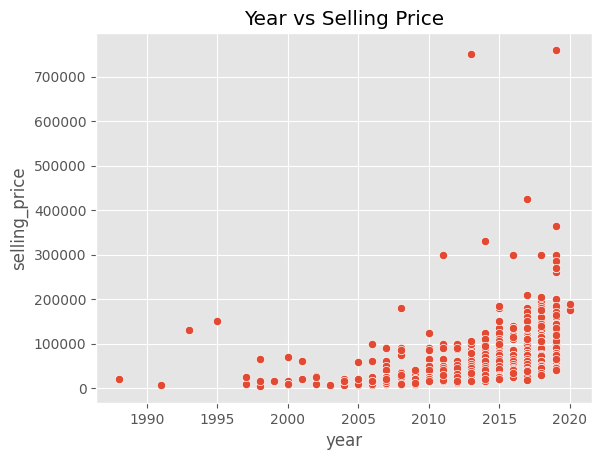

In [89]:
import seaborn as sns
sns.scatterplot(data=bike_df, x='year', y='selling_price')
plt.title('Year vs Selling Price')
plt.show()

Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [90]:
import datetime
current_year = datetime.datetime.now().year
bike_df['bike_age'] = current_year - bike_df['year']
bike_df.groupby('bike_age')['selling_price'].mean()

,selling_price
bike_age,
5,183333.333333
6,119689.511628
7,87660.374046
8,78894.736842
9,58469.018692
10,56500.000000
11,48668.131868
12,51136.986301
13,35748.400000


Q14. Which bike names are priced significantly above the average price for their manufacturing year?

In [91]:
avg_price_by_year = bike_df.groupby('year')['selling_price'].mean()
high_priced_bikes = bike_df[bike_df.apply(
    lambda row: row['selling_price'] > avg_price_by_year[row['year']], axis=1
)]
high_priced_bikes[['name', 'selling_price', 'year']]

,name,selling_price,year
0,Royal Enfield Classic 350,175000,2019
2,Royal Enfield Classic Gunmetal Grey,150000,2018
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015
7,Royal Enfield Bullet 350 [2007-2011],180000,2008
13,Yamaha YZF R3,365000,2019
14,Jawa 42,185000,2020
16,Hero Honda Glamour,25000,2006
17,Yamaha YZF R15 S,40000,2010
18,Royal Enfield Classic Gunmetal Grey,150000,2018
19,Yamaha FZ25,120000,2018


Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

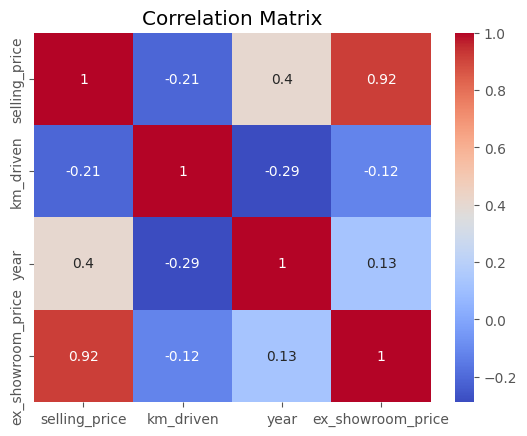

In [92]:
correlation_matrix = bike_df[['selling_price', 'km_driven', 'year', 'ex_showroom_price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#practical -2 Car Sale Dataset

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Car Sale.csv')
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


Q1. What is the average selling price of cars for each dealer and how does it compare across different dealers?

In [94]:
df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

,Price ($)
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Saab-Belle Dodge,28190.139888
Capitol KIA,28189.703822


Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [95]:
df.groupby('Company')['Price ($)'].agg(['min', 'max', 'mean']).assign(price_range=lambda x: x['max'] - x['min'])

,min,max,mean,price_range
Company,,,,
Acura,14000,45501,24758.561684,31501
Audi,12000,85500,22851.790598,73500
BMW,9000,69500,25090.622785,60500
Buick,12000,62801,33634.362187,50801
Cadillac,13000,85800,40972.093558,72800
Chevrolet,10000,82800,26198.606377,72800
Chrysler,12000,51800,26019.529464,39800
Dodge,10000,60851,26406.341113,50851
Ford,1200,69600,29263.682156,68400


Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

<Axes: xlabel='Transmission', ylabel='Price ($)'>

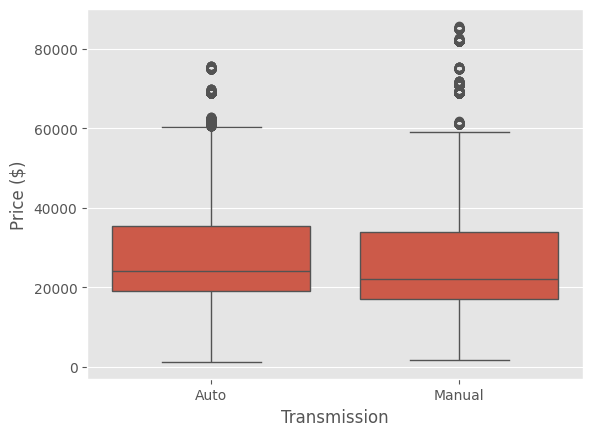

In [96]:
sns.boxplot(data=df, x='Transmission', y='Price ($)')

Q4. What is the distribution of car prices across different regions?

<Axes: title={'center': 'Price ($)'}, xlabel='Dealer_Region'>

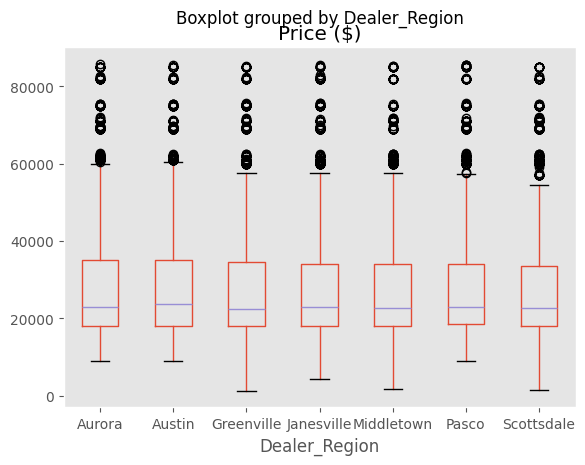

In [97]:
df.boxplot(column='Price ($)', by='Dealer_Region', grid=False)

Q5. What is the distribution of cars based on body styles?

In [98]:
df['Body Style'].value_counts()

,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


Q6. How does the average selling price of cars vary by customer gender and annual income?

In [99]:
df.groupby('Gender').agg({'Price ($)': 'mean', 'Annual Income': 'mean'})

,Price ($),Annual Income
Gender,,
Female,28277.265270,755973.021339
Male,28039.429407,851184.044207


Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

<Axes: xlabel='Dealer_Region'>

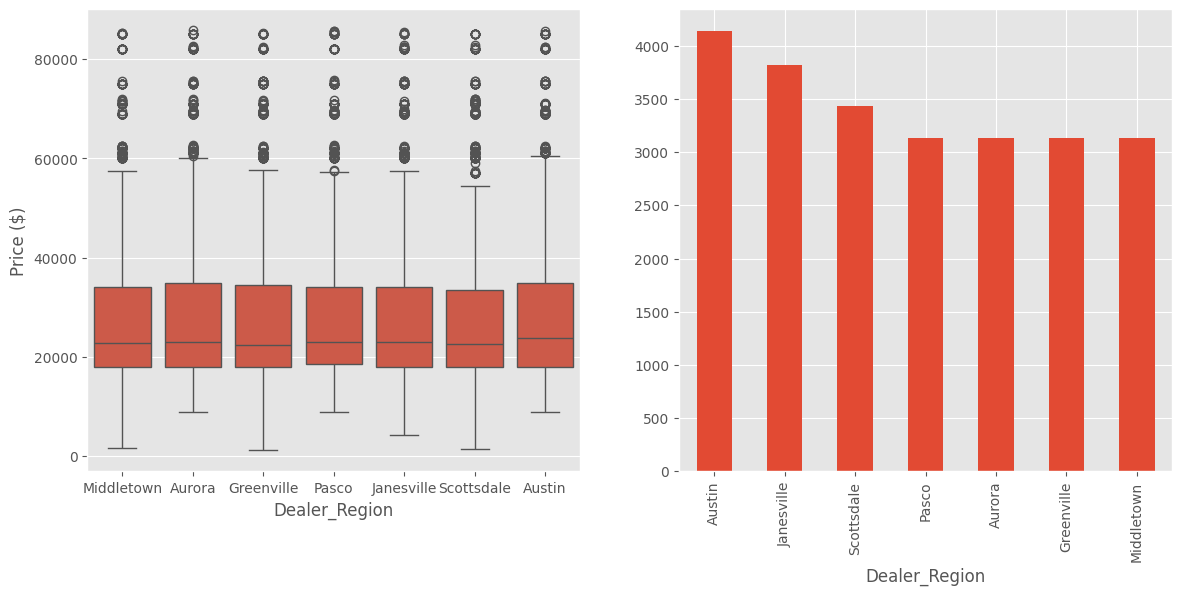

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', ax=ax[0])
df['Dealer_Region'].value_counts().plot(kind='bar', ax=ax[1])

Q8. How does the average car price differ between cars with different engine sizes?

In [101]:
df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


Q9. How do car prices vary based on the customer’s annual income bracket?

In [102]:
income_bins = [0, 30000, 60000, 100000, 150000, float('inf')]
income_labels = ['0-30k', '30k-60k', '60k-100k', '100k-150k', '150k+']
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)
df.groupby('Income_Bracket')['Price ($)'].mean()

,Price ($)
Income_Bracket,
0-30k,27884.297820
30k-60k,NaN
60k-100k,43000.000000
100k-150k,23200.200000
150k+,28149.089557


Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

<Axes: xlabel='Model', ylabel='Price ($)'>

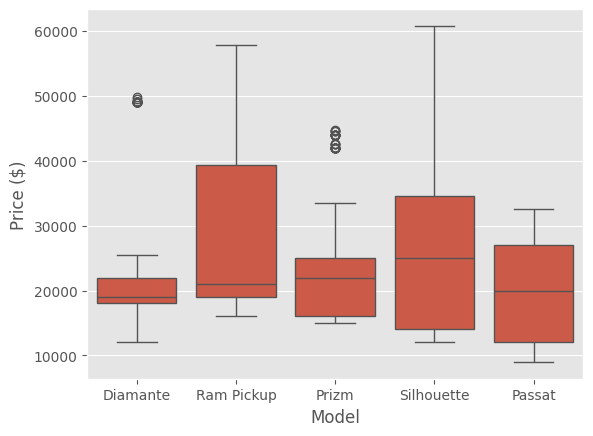

In [103]:
top_5_models = df['Model'].value_counts().head(5).index
sns.boxplot(data=df[df['Model'].isin(top_5_models)], x='Model', y='Price ($)')

Q11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

,Price ($)
Color,
Red,15519.360962
Black,15286.065976
Pale White,14077.346859


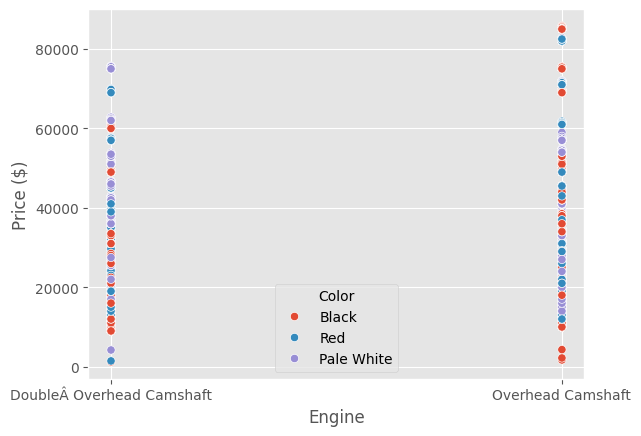

In [104]:
sns.scatterplot(data=df, x='Engine', y='Price ($)', hue='Color')
df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)

Q12. Is there any seasonal trend in car sales based on the date of sale?

<Axes: title={'center': 'Car Sales by Month'}, xlabel='Sale_Month'>

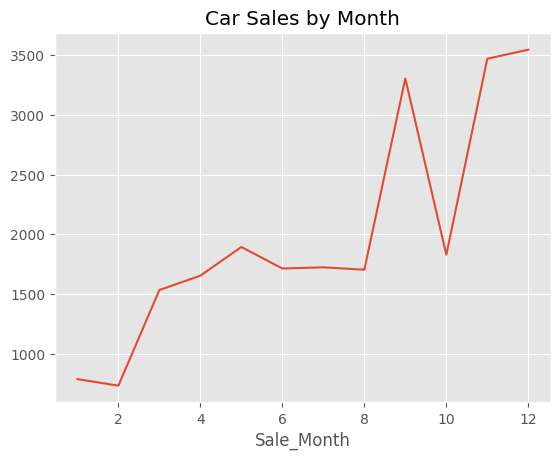

In [105]:
df['Sale_Month'] = pd.to_datetime(df['Date']).dt.month
df.groupby('Sale_Month').size().plot(kind='line', title="Car Sales by Month")

Q13. How does the car price distribution change when considering different combinations of body style and transmission type?

<Axes: xlabel='Body Style', ylabel='Price ($)'>

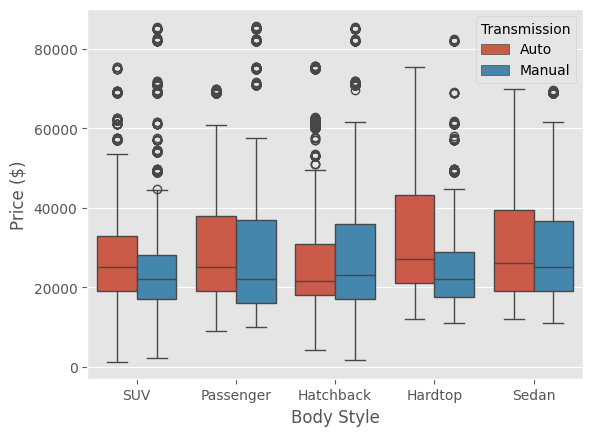

In [106]:
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')

Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

Price ($)         int64
Engine_encoded     int8
Annual Income     int64
dtype: object
                Price ($)  Engine_encoded  Annual Income
Price ($)        1.000000       -0.011271       0.012065
Engine_encoded  -0.011271        1.000000      -0.006598
Annual Income    0.012065       -0.006598       1.000000


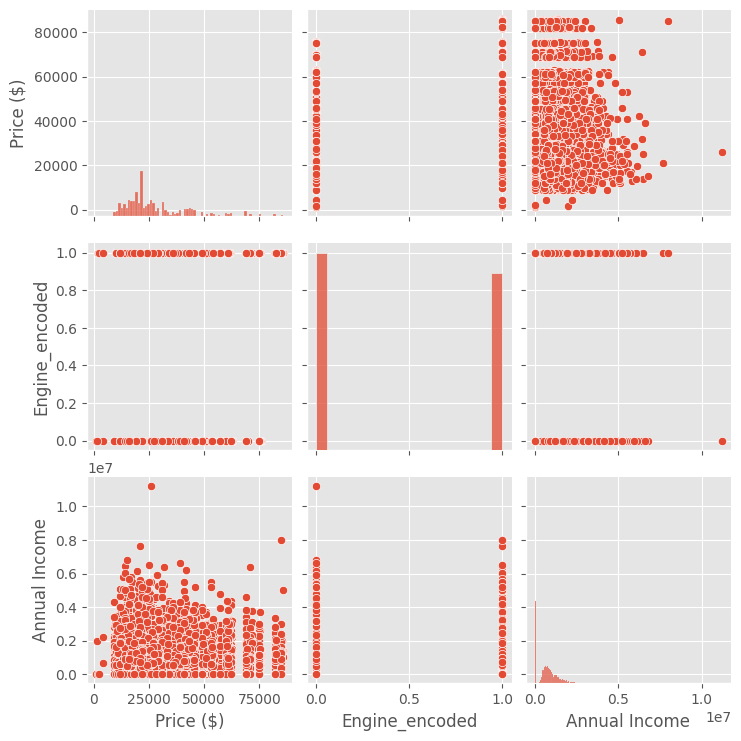

In [109]:

df['Engine_cleaned'] = df['Engine'].astype(str).str.replace(r'\xa0|Â', ' ', regex=True).str.strip()
df['Engine_encoded'] = df['Engine_cleaned'].astype('category').cat.codes


print(df[['Price ($)', 'Engine_encoded', 'Annual Income']].dtypes)


correlation_matrix = df[['Price ($)', 'Engine_encoded', 'Annual Income']].corr()
print(correlation_matrix)


import seaborn as sns
sns.pairplot(df[['Price ($)', 'Engine_encoded', 'Annual Income']])


Q15. How does the average car price vary across different car models and engine types?

In [110]:
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()


avg_price_df = pd.DataFrame(avg_price_by_model_engine)


avg_price_df


Engine,DoubleÂ Overhead Camshaft,Overhead Camshaft
Model,,
3-Sep,37986.380117,NaN
3000GT,22764.326923,21770.659864
300M,21394.888889,NaN
323i,16744.632287,21038.162162
328i,21069.149606,38676.177215
4Runner,32167.794118,25075.416667
5-Sep,41067.000000,28071.454545
528i,46288.712963,21197.898148
A4,27070.500000,12046.220000


# practical-3 Amazon sales

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
pd.set_option('display.max_rows', None)

%matplotlib inline

file_path = 'amazon.csv'
data = pd.read_csv(file_path)


data.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [112]:
data.info()
missing_values = data.isnull().sum()
duplicates = data.duplicated().sum()
missing_values, duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

(product_id             0
 product_name           0
 category               0
 discounted_price       0
 actual_price           0
 discount_percentage    0
 rating                 0
 rating_count           2
 about_product          0
 user_id                0
 user_name              0
 review_id              0
 review_title           0
 review_content         0
 img_link               0
 product_link           0
 dtype: int64,
 np.int64(0))

In [113]:

data['discounted_price'] = data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data['actual_price'] = data['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

data['discount_percentage'] = data['discount_percentage'].str.replace('%', '').astype(float)

data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

data['rating_count'] = data['rating_count'].str.replace(',', '').astype(float)

data['rating_count'].fillna(0, inplace=True)

data['main_category'] = data['category'].str.split('|').str[0]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

1. What is the average rating for each product category?

In [114]:

category_avg_rating = data.groupby('main_category')['rating'].mean().sort_values(ascending=False)


category_avg_rating = category_avg_rating.reset_index()
category_avg_rating.columns = ['Category', 'Average Rating']


print("Average Rating for Each Product Category:")
category_avg_rating


Average Rating for Each Product Category:


,Category,Average Rating
0,OfficeProducts,4.309677
1,Toys&Games,4.300000
2,HomeImprovement,4.250000
3,Computers&Accessories,4.154967
4,Electronics,4.081749
5,Home&Kitchen,4.040716
6,Health&PersonalCare,4.000000
7,MusicalInstruments,3.900000
8,Car&Motorbike,3.800000


2. What are the top rating_count products by category?

In [115]:
top_products_by_category = (
    data.sort_values(by=['main_category', 'rating_count'], ascending=[True, False])
    .groupby('main_category')
    .head(3)[['main_category', 'product_name', 'rating_count', 'rating']]
)


print("Top Products by Category Based on Rating Count:")
top_products_by_category


Top Products by Category Based on Rating Count:


,main_category,product_name,rating_count,rating
1157,Car&Motorbike,Reffair AX30 [MAX] Portable Air Purifier for C...,1118.0,3.8
588,Computers&Accessories,SanDisk Cruzer Blade 32GB USB Flash Drive,253105.0,4.3
718,Computers&Accessories,SanDisk Ultra Dual 64 GB USB 3.0 OTG Pen Drive...,189104.0,4.3
143,Computers&Accessories,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,179692.0,4.2
12,Electronics,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0,4.4
47,Electronics,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0,4.4
65,Electronics,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0,4.4
1247,Health&PersonalCare,Dr Trust Electronic Kitchen Digital Scale Weig...,3663.0,4.0
1028,Home&Kitchen,Pigeon Polypropylene Mini Handy and Compact Ch...,270563.0,4.1
1022,Home&Kitchen,Pigeon by Stovekraft Amaze Plus Electric Kettl...,123365.0,3.9


3. What is the distribution of discounted prices vs. actual prices?

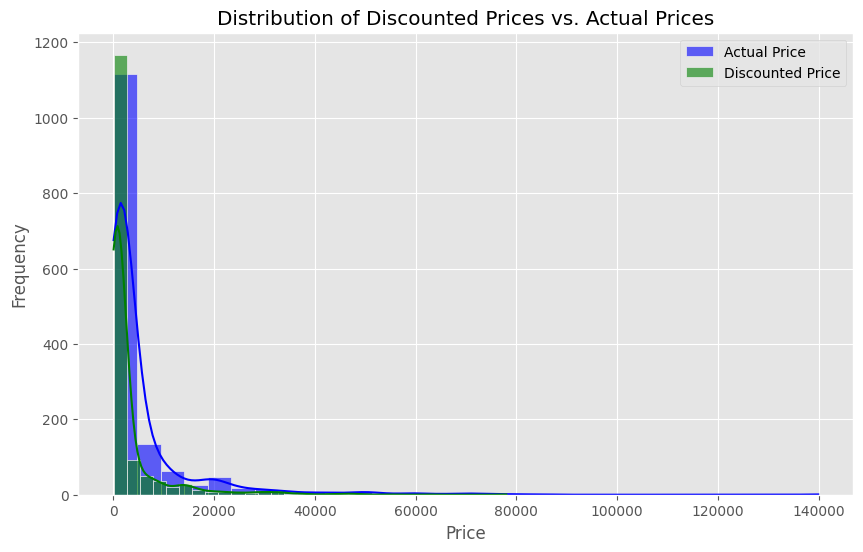

In [116]:
plt.figure(figsize=(10, 6))
sns.histplot(data['actual_price'], bins=30, label='Actual Price', color='blue', kde=True, alpha=0.6)
sns.histplot(data['discounted_price'], bins=30, label='Discounted Price', color='green', kde=True, alpha=0.6)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Q.4How does the average discount percentage vary across categories?

In [117]:

average_discount_by_category = data.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)


average_discount_by_category = average_discount_by_category.reset_index()
average_discount_by_category.columns = ['Category', 'Average Discount (%)']


print("Average Discount Percentage by Category:")
average_discount_by_category

Average Discount Percentage by Category:


,Category,Average Discount (%)
0,HomeImprovement,57.500000
1,Computers&Accessories,54.024283
2,Health&PersonalCare,53.000000
3,Electronics,50.828897
4,MusicalInstruments,46.000000
5,Car&Motorbike,42.000000
6,Home&Kitchen,40.120536
7,OfficeProducts,12.354839
8,Toys&Games,0.000000


5.What are the most popular product names?

In [118]:

most_popular_products = (
    data[['product_name', 'rating_count']]
    .sort_values(by='rating_count', ascending=False)
    .head(10)
)


print("Most Popular Product Names:")
most_popular_products


Most Popular Product Names:


,product_name,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,426972.0
400,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
352,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711.0
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836.0
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836.0
566,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",313832.0


6. What are the most popular product keywords?

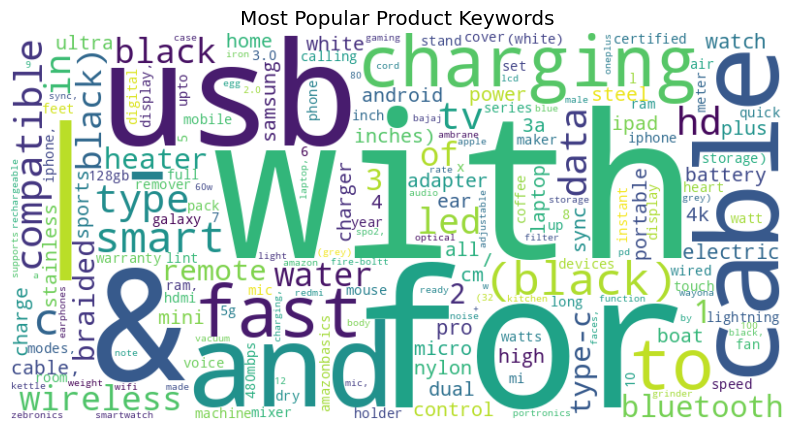

Top Product Keywords:
    Keyword  Frequency
0      with        751
1       for        672
2         |        457
3         &        432
4       usb        377
5       and        330
6     cable        320
7         -        220
8  charging        219
9        to        218


In [119]:
from collections import Counter
from wordcloud import WordCloud


keywords = ' '.join(data['product_name'].str.lower())
word_count = Counter(keywords.split())


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Product Keywords')
plt.show()


top_keywords = pd.DataFrame(word_count.most_common(10), columns=['Keyword', 'Frequency'])
print("Top Product Keywords:")
print(top_keywords)

7. What are the most popular product reviews?

In [120]:

most_popular_reviews = data[['product_name', 'review_title', 'rating_count']].sort_values(by='rating_count', ascending=False).head(10)


print("Most Popular Product Reviews:")
most_popular_reviews


Most Popular Product Reviews:


,product_name,review_title,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,"It's quite good and value for money,Works well...",426973.0
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","It's quite good and value for money,Works well...",426973.0
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","It's quite good and value for money,Works well...",426973.0
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,"It's quite good and value for money,Works well...",426972.0
400,boAt Bassheads 100 in Ear Wired Earphones with...,"Best value for money,HEAD PHONE POUCH NOT RECE...",363713.0
352,boAt Bassheads 100 in Ear Wired Earphones with...,"Best value for money,HEAD PHONE POUCH NOT RECE...",363713.0
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,"Best value for money,HEAD PHONE POUCH NOT RECE...",363711.0
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...","Best phone for below normal use,Good mobile fo...",313836.0
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...","Best phone for below normal use,Good mobile fo...",313836.0
566,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...","Best phone for below normal use,Good mobile fo...",313832.0


8. What is the correlation between discounted_price and rating?

In [121]:

correlation = data['discounted_price'].corr(data['rating'])


print(f"Correlation between Discounted Price and Rating: {correlation}")

Correlation between Discounted Price and Rating: 0.12033741712288548


9. What are the Top 5 categories based on the highest ratings?

In [122]:

top_categories_by_rating = data.groupby('main_category')['rating'].mean().sort_values(ascending=False).head(5)


top_categories_by_rating = top_categories_by_rating.reset_index()
top_categories_by_rating.columns = ['Category', 'Average Rating']


print("Top 5 Categories Based on Highest Ratings:")
top_categories_by_rating


Top 5 Categories Based on Highest Ratings:


,Category,Average Rating
0,OfficeProducts,4.309677
1,Toys&Games,4.300000
2,HomeImprovement,4.250000
3,Computers&Accessories,4.154967
4,Electronics,4.081749


10. Identify any potential areas for improvement or optimization based on the data analysis.

In [123]:

# 1. Categories with low ratings may need improvement in product quality.
low_rated_categories = data.groupby('main_category')['rating'].mean().sort_values().head(5)
print("Categories with Lowest Average Ratings:")
print(low_rated_categories)

# 2. Products with high actual prices and low discounts could be optimized for better sales.
high_price_low_discount = data[(data['actual_price'] > data['actual_price'].median()) &
                               (data['discount_percentage'] < data['discount_percentage'].median())]
print("High Price and Low Discount Products:")
high_price_low_discount[['product_name', 'actual_price', 'discount_percentage']].head(10)

Categories with Lowest Average Ratings:
main_category
Car&Motorbike          3.800000
MusicalInstruments     3.900000
Health&PersonalCare    4.000000
Home&Kitchen           4.040716
Electronics            4.081749
Name: rating, dtype: float64
High Price and Low Discount Products:


,product_name,actual_price,discount_percentage
16,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,24999.0,44.0
19,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,21990.0,39.0
20,Duracell USB Lightning Apple Certified (Mfi) B...,1799.0,46.0
22,Samsung 80 cm (32 Inches) Wondertainment Serie...,22900.0,41.0
24,Acer 80 cm (32 inches) I Series HD Ready Andro...,19990.0,42.0
26,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,19999.0,25.0
38,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,45999.0,28.0
41,Mi 108 cm (43 inches) Full HD Android LED TV 4...,34999.0,43.0
50,TP-Link AC600 600 Mbps WiFi Wireless Network U...,2199.0,45.0
53,VW 80 cm (32 inches) Frameless Series HD Ready...,12999.0,46.0


# practical 4 Spotify data

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

pd.set_option('display.max_rows', None)

%matplotlib inline

In [125]:
file_path = 'spotify.csv'
spotify_data = pd.read_csv(file_path)

In [126]:
spotify_data.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [127]:

null_values = spotify_data.isnull().sum()


duplicate_rows = spotify_data.duplicated().sum()


if duplicate_rows > 0:
    spotify_data = spotify_data.drop_duplicates()

print("Null Values per Column:\n", null_values)
print(f"Number of Duplicate Rows: {duplicate_rows}")

Null Values per Column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of Duplicate Rows: 27


2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

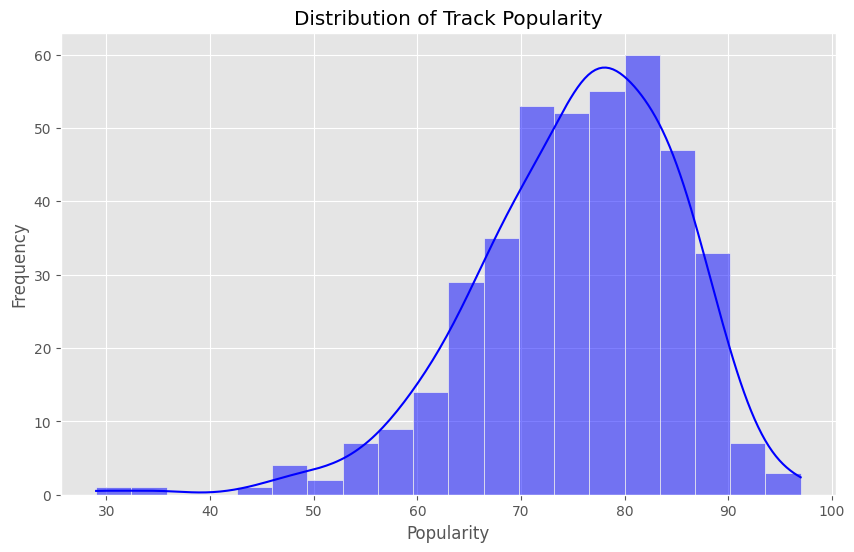

In [128]:

plt.figure(figsize=(10, 6))
sns.histplot(spotify_data['Popularity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

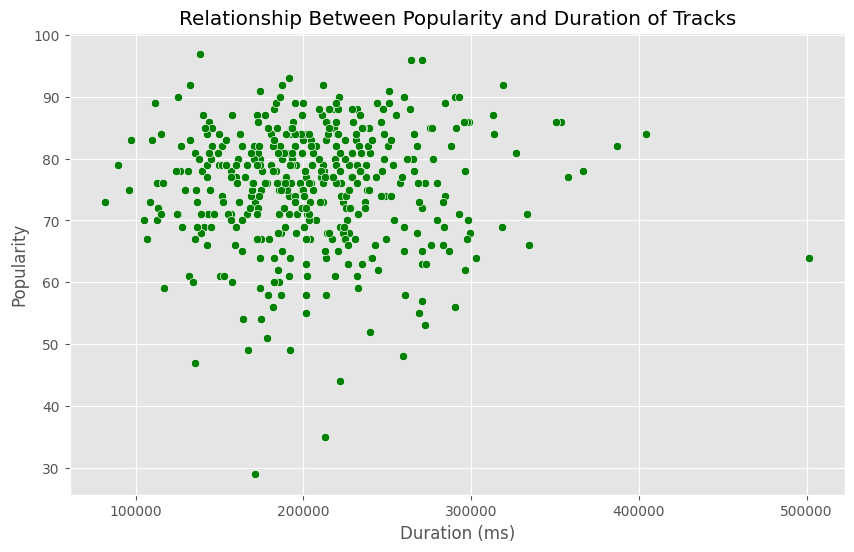

In [129]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=spotify_data['Duration (ms)'], y=spotify_data['Popularity'], color='green')
plt.title('Relationship Between Popularity and Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

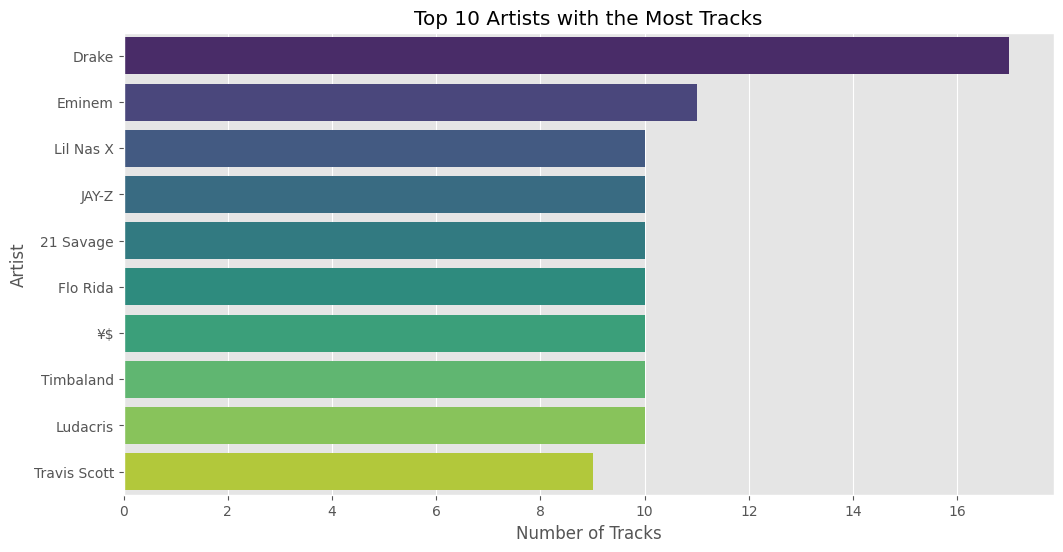

Artist with Most Tracks: Drake (17 tracks)


In [130]:

top_artists = spotify_data['Artist'].value_counts()


plt.figure(figsize=(12, 6))
sns.countplot(y=spotify_data['Artist'],
              order=spotify_data['Artist'].value_counts().head(10).index,
              palette='viridis')
plt.title('Top 10 Artists with the Most Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()


most_tracks_artist = top_artists.idxmax()
most_tracks_count = top_artists.max()
print(f"Artist with Most Tracks: {most_tracks_artist} ({most_tracks_count} tracks)")

5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [131]:

least_popular_tracks = spotify_data.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:\n", least_popular_tracks)


Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [132]:

top_5_artists = spotify_data['Artist'].value_counts().head(5).index


average_popularity_top_artists = (
    spotify_data[spotify_data['Artist'].isin(top_5_artists)]
    .groupby('Artist')['Popularity']
    .mean()
    .sort_values(ascending=False)
)

print("Average Popularity for Top 5 Most Popular Artists:\n", average_popularity_top_artists)


Average Popularity for Top 5 Most Popular Artists:
 Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [133]:

most_popular_tracks_top_artists = (
    spotify_data[spotify_data['Artist'].isin(top_5_artists)]
    .sort_values(by=['Artist', 'Popularity'], ascending=[True, False])
    .groupby('Artist')
    .first()
)[['Track Name', 'Popularity']]

print("Most Popular Tracks for Top 5 Artists:\n", most_popular_tracks_top_artists)

Most Popular Tracks for Top 5 Artists:
                                         Track Name  Popularity
Artist                                                        
21 Savage                                   redrum          96
Drake      Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Eminem                                  Without Me          90
JAY-Z                              Ni**as In Paris          86
Lil Nas X                        THATS WHAT I WANT          81


8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

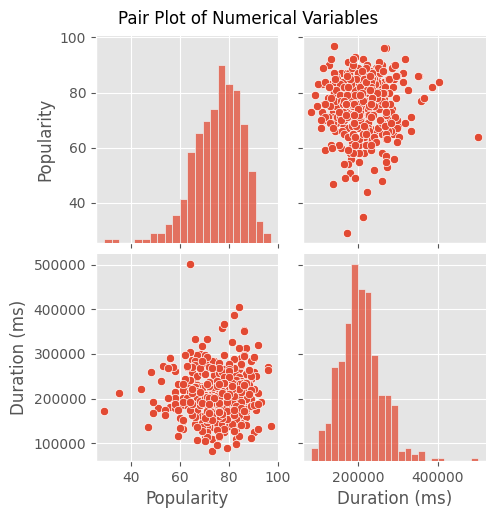

In [134]:

sns.pairplot(spotify_data[['Popularity', 'Duration (ms)']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

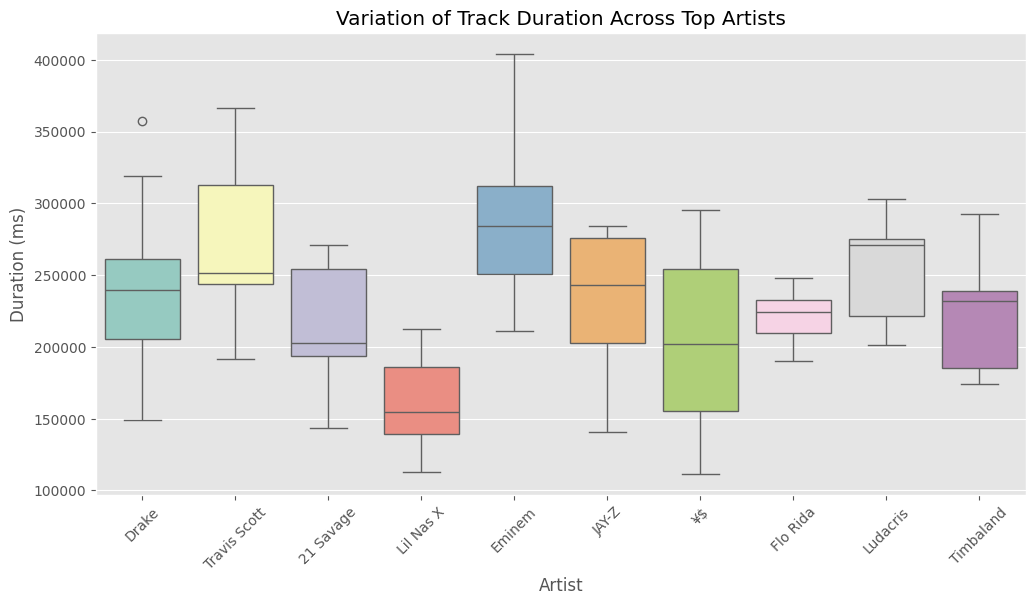

In [135]:

top_10_artists = spotify_data['Artist'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)',
            data=spotify_data[spotify_data['Artist'].isin(top_10_artists)],
            palette='Set3')
plt.title('Variation of Track Duration Across Top Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45)
plt.show()


10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

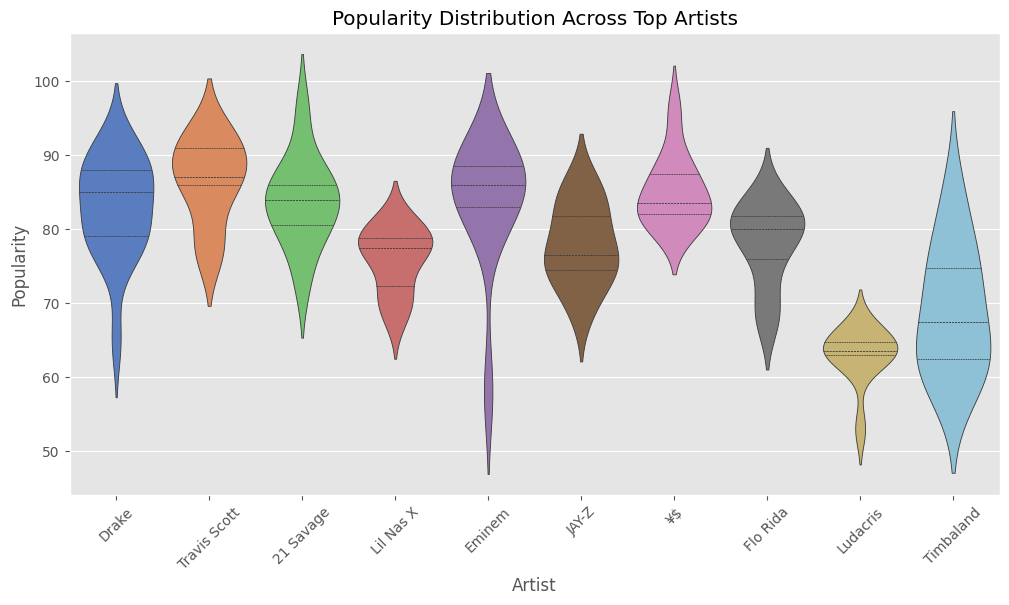

In [136]:

plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity',
               data=spotify_data[spotify_data['Artist'].isin(top_10_artists)],
               inner='quartile', palette='muted')
plt.title('Popularity Distribution Across Top Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()